In [189]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
     

df = pd.DataFrame()
     

df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]
     

df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

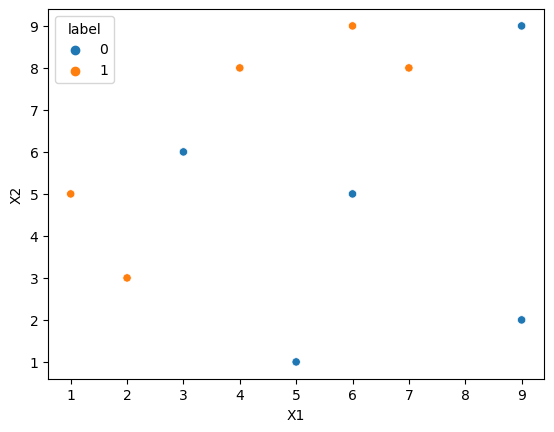

In [2]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [ ]:
def update_row_weights(row,alpha):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)
     

    

In [121]:

def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error+0.0000001))

In [122]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [123]:
def next_decision_trump(df):
    index_values = create_new_dataset(df)
    next_df = df.iloc[index_values,[0,1,2,3]]
    return next_df

In [253]:
def prediction(df):  
    from sklearn.tree import DecisionTreeClassifier
    
    dt = DecisionTreeClassifier(max_depth=1)
    X = df.iloc[:,0:2].values
    y = df.iloc[:,2].values
    dt.fit(df.iloc[:,0:2],df.iloc[:,2])
    df['y_pred'] = dt.predict(df.iloc[:,0:2])
    error = np.sum(df['weights'] * (df['y_pred'] != df['label'])) / np.sum(df['weights'])
    return error,dt

In [ ]:
 
class ada_boosting:
    alpha=[]
    estimators=None
    model=[]
    def fit(self,df,n_estimators):
        flag=0
        i=0
        df['weights'] = 1/df.shape[0]
        self.estimators=n_estimators
        while n_estimators!=flag:
            error,dt=prediction(df)
            self.model.append(dt)
            
            alph = calculate_model_weight(error)
            self.alpha.append(alph)
            
            df['weights'] *= np.exp(-alph * df['label'] * df['y_pred'])
            df['weights'] /= df['weights'].sum()
            
            
            def update_row_weights(row):
                if row['label'] == row['y_pred']:
                    return row['weights'] * np.exp(-alph)
                else:
                    return row['weights'] * np.exp(alph)
                
            df['updated_weights'] = df.apply(update_row_weights,axis=1)
            
            
            df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
            
            df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])
            

            df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']
            print(df)
            df=next_decision_trump(df)
            flag = flag+1
  
    def pred(self,n1,n2,dt):
        flag=0
        while self.estimators != flag:
            query = np.array([n1,n2]).reshape(1,2)
            result=self.model[flag].predict(query)
            if result ==0:
                result=-1
            alpha = 0
            alpha=alpha+(self.alpha[flag]*result)
            
            flag = flag+1
        print(alpha)    
        f_result=np.sign(alpha)
        if f_result==-1:
            return 0
        else:
            return 1
        

In [246]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

class AdaBoosting:
    def __init__(self):
        self.alpha = []  # Store model weights
        self.estimators = 0  # Number of estimators
        self.models = []  # Store weak learners

    def fit(self, df, n_estimators):
        """Train AdaBoost classifier using decision stumps."""
        self.estimators = n_estimators
        df['weights'] = 1 / df.shape[0]  # Initialize weights
        
        for _ in range(n_estimators):
            # Train weak classifier
            dt = DecisionTreeClassifier(max_depth=1)
            dt.fit(df.iloc[:, :-2], df['label'], sample_weight=df['weights'])
            
            # Get predictions and compute error
            df['y_pred'] = dt.predict(df.iloc[:, :-2])
            error = np.sum(df['weights'] * (df['y_pred'] != df['label'])) / np.sum(df['weights'])
            
            # Avoid division by zero
            if error == 0:
                error = 1e-10
            
            alph = 0.5 * np.log((1 - error) / error)
            # Compute alpha (model weight)
            self.alpha.append(alph)
            self.models.append(dt)
            
            # Update weights
            df['weights'] *= np.exp(-alph * df['label'] * df['y_pred'])
            df['weights'] /= df['weights'].sum()  # Normalize weights
            print(df)
            
    def predict(self, n1, n2):
        """Make predictions using the trained AdaBoost model."""
        query = np.array([n1, n2]).reshape(1, -1)
        final_prediction = 0
        
        for alpha, model in zip(self.alpha, self.models):
            pred = model.predict(query)[0]
            final_prediction += alpha * (1 if pred == 1 else -1)
        
        return 1 if final_prediction >= 0 else 0


In [236]:
ada.model[1].predict([[5,1]])

array([0], dtype=int64)

In [255]:
df = pd.DataFrame()
     

df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]
     

In [256]:
AB=AdaBoosting()
model=AB.fit(df,10)

   X1  X2  label   weights  y_pred
0   1   5      1  0.079129       1
1   2   3      1  0.079129       1
2   3   6      0  0.120871       1
3   4   8      1  0.079129       1
4   5   1      0  0.120871       0
5   6   9      1  0.079129       1
6   6   5      0  0.120871       1
7   7   8      1  0.079129       1
8   9   9      0  0.120871       1
9   9   2      0  0.120871       0
   X1  X2  label   weights  y_pred
0   1   5      1  0.000001       1
1   2   3      1  0.000001       1
2   3   6      0  0.199999       0
3   4   8      1  0.000001       1
4   5   1      0  0.199999       0
5   6   9      1  0.000001       1
6   6   5      0  0.199999       0
7   7   8      1  0.000001       1
8   9   9      0  0.199999       0
9   9   2      0  0.199999       0
   X1  X2  label       weights  y_pred
0   1   5      1  1.309307e-11       1
1   2   3      1  1.309307e-11       1
2   3   6      0  2.000000e-01       0
3   4   8      1  1.309307e-11       1
4   5   1      0  2.000000e-01     

In [257]:
ada=ada_boosting()
model=ada.fit(df,10)




   X1  X2  label  weights  y_pred  updated_weights  nomalized_weights  \
0   1   5      1      0.1       1         0.065465           0.071429   
1   2   3      1      0.1       1         0.065465           0.071429   
2   3   6      0      0.1       1         0.152752           0.166667   
3   4   8      1      0.1       1         0.065465           0.071429   
4   5   1      0      0.1       0         0.065465           0.071429   
5   6   9      1      0.1       1         0.065465           0.071429   
6   6   5      0      0.1       1         0.152752           0.166667   
7   7   8      1      0.1       1         0.065465           0.071429   
8   9   9      0      0.1       1         0.152752           0.166667   
9   9   2      0      0.1       0         0.065465           0.071429   

   cumsum_upper  cumsum_lower  
0      0.071429      0.000000  
1      0.142857      0.071429  
2      0.309524      0.142857  
3      0.380952      0.309524  
4      0.452381      0.380952  
5   

In [ ]:
AB.predict(4,8)

TypeError: AdaBoosting.predict() takes 3 positional arguments but 4 were given

In [217]:
ada.pred(4,8,model)

[8.05904783]


1

In [106]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0
